In [1]:
using Distributed
addprocs(44);

In [2]:
using pulse_input_DDM

In [3]:
θy = Sigmoid(10.,60.,0.3,1.)

Sigmoid{Float64}
  a: Float64 10.0
  b: Float64 60.0
  c: Float64 0.3
  d: Float64 1.0


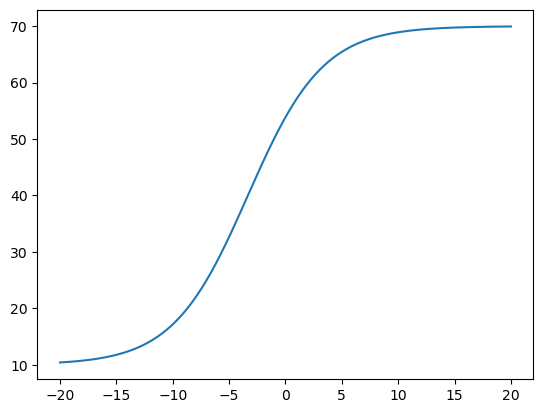

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f23b40c8630>

In [4]:
using PyPlot
plot(collect(-20.:0.1:20.), θy.(collect(-20.:0.1:20.), 0.))

In [5]:
f, ncells, ntrials, nparams = "Sigmoid", [5,4,2], [300,400,500], 4

θ_syn = θneural(θz = θz(σ2_i = 0.5, B = 20., λ = -0.5, σ2_a = 10., σ2_s = 0.1,
    ϕ = 0.6, τ_ϕ =  0.02),
    θy=[[Sigmoid(10., 60., 0.3*rand([-1,1]), rand([-1.,1.])) for n in 1:N] for N in ncells], ncells=ncells,
    nparams=nparams, f=f)

θneural{θz{Float64},Array{Array{Sigmoid{Float64},1},1}}
  θz: θz{Float64}
  θy: Array{Array{Sigmoid{Float64},1}}((3,))
  ncells: Array{Int64}((3,)) [5, 4, 2]
  nparams: Int64 4
  f: String "Sigmoid"


In [6]:
f, ncells, ntrials, nparams = "Sigmoid", [2], [5_000], 4

θ_syn = θneural(θz = θz(σ2_i = 0.5, B = 20., λ = -0.5, σ2_a = 10., σ2_s = 0.1,
    ϕ = 0.6, τ_ϕ =  0.02),
    θy=[[Sigmoid(10., 60., 0.3*rand([-1,1]), rand([-1.,1.])) for n in 1:N] for N in ncells], ncells=ncells,
    nparams=nparams, f=f)

θneural{θz{Float64},Array{Array{Sigmoid{Float64},1},1}}
  θz: θz{Float64}
  θy: Array{Array{Sigmoid{Float64},1}}((1,))
  ncells: Array{Int64}((1,)) [2]
  nparams: Int64 4
  f: String "Sigmoid"


In [7]:
data, μ_rnt, μ_t = synthetic_data(θ_syn, ntrials; centered=true, pos_ramp=false);

In [8]:
n = 53;

In [9]:
loglikelihood(θ_syn, data, n)

-473726.3113618728

In [10]:
θy0 = vcat(vcat(initialize_θy.(data, f)...)...);

In [11]:
fit=vcat(trues(dimz), trues(sum(ncells)*nparams))
x0=vcat([0.5, 9., -2., 10., 1., 0.4, 0.008], θy0);

In [12]:
options = neuraloptions(ncells=ncells, x0=x0, fit=fit, nparams=nparams, f=f);

In [13]:
model, = optimize(data, options, n; scaled=false, f_tol=1e-9)

Fminbox
-------
Initial mu = 0.806154

Fminbox iteration 1
-------------------
Calling inner optimizer with mu = 0.806154

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     5.047239e+05     1.109290e+05
 * time: 5.698204040527344e-5
     1     5.031687e+05     1.122738e+05
 * time: 9.573920011520386
     2     4.916341e+05     1.523689e+03
 * time: 19.785786867141724
     3     4.883483e+05     1.851740e+03
 * time: 29.873373985290527
     4     4.869612e+05     2.494086e+03
 * time: 40.11652493476868
     5     4.864602e+05     2.838759e+03
 * time: 50.282511949539185
     6     4.859358e+05     3.105856e+03
 * time: 60.516671895980835
     7     4.858363e+05     3.029185e+03
 * time: 70.8436188697815
     8     4.856840e+05     2.753336e+03
 * time: 81.09202194213867
     9     4.856092e+05     1.480436e+03
 * time: 91.27239203453064
    10     4.855979e+05     1.477184e+03
 * time: 101.4978380203247
    11     4.854598e+05     3.177356e

   117     4.736340e+05     2.080365e+03
 * time: 1305.2612478733063

Exiting inner optimizer with x = [0.2108232385038158, 24.102366496038936, -0.49213105984717687, 0.0004086523136369902, 0.19542360257479494, 0.6364516205084467, 0.01858080206337906, 10.015487645282477, 60.615181547535485, 0.28687527358003173, -1.0303691581992498, 9.81277262785603, 60.60114304643962, 0.27635392198394687, 0.9474529602603375]
Current distance to box: 0.000408652
Decreasing barrier term μ.

Fminbox iteration 2
-------------------
Calling inner optimizer with mu = 0.000806154

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     4.736778e+05     1.096294e+02
 * time: 4.9114227294921875e-5
     1     4.736778e+05     3.029750e+02
 * time: 20.395308017730713
     2     4.736773e+05     4.447626e+03
 * time: 40.82324194908142
     3     4.736773e+05     4.474322e+03
 * time: 66.60581994056702
     4     4.736772e+05     4.467145e+03
 * time: 87.00348711013794
     5

(neuralDDM{θneural{θz{Float64},Array{Array{Sigmoid{Float64},1},1}},Array{Array{neuraldata,1},1}}
  θ: θneural{θz{Float64},Array{Array{Sigmoid{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((1,))
,  * Status: success

 * Candidate solution
    Minimizer: [2.96e-01, 2.19e+01, -4.99e-01,  ...]
    Minimum:   4.736619e+05

 * Found with
    Algorithm:     Fminbox with BFGS
    Initial Point: [5.00e-01, 9.00e+00, -2.00e+00,  ...]

 * Convergence measures
    |x - x'|               = 5.82e-05 ≰ 1.0e-10
    |x - x'|/|x'|          = 6.49e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.85e-05 ≰ 1.0e-09
    |f(x) - f(x')|/|f(x')| = 1.45e-10 ≰ 0.0e+00
    |g(x)|                 = 1.01e+01 ≰ 1.0e-03

 * Work counters
    Seconds run:   1933  (vs limit Inf)
    Iterations:    3
    f(x) calls:    2635
    ∇f(x) calls:   439
)

In [14]:
pulse_input_DDM.flatten(model.θ)

15-element Array{Float64,1}:
  0.2962164635427144  
 21.8926452459826     
 -0.4989754117466303  
  5.114686825869814   
  0.013117551674679389
  0.6343228352239778  
  0.019710432504854533
 10.027633624527319   
 60.57944190262204    
  0.2934056207471556  
 -1.0304851487698805  
  9.829888668982212   
 60.58746940399063    
  0.2824304188411855  
  0.9465579994495747  

### Compute Hessian
Blah blah blah

In [15]:
H = Hessian(model, n)
CI, HPSD = CIs(H);

In [16]:
CI

15-element Array{Float64,1}:
 0.48866877425226474 
 5.8685662700726695  
 0.14053087013187276 
 4.282845910024707   
 0.08708030833096013 
 0.07070183375572925 
 0.004815018944977865
 0.3589049613847241  
 1.378728006609921   
 0.01956927643200986 
 0.04653496306885156 
 0.6991649533373822  
 1.1917820838553284  
 0.02008083628380654 
 0.06519867332718784 

In [17]:
hcat(collect(pulse_input_DDM.flatten(model.θ)) - CI, collect(pulse_input_DDM.flatten(θ_syn)), collect(pulse_input_DDM.flatten(model.θ)) + CI)

15×3 Array{Float64,2}:
 -0.192452    0.5    0.784885 
 16.0241     20.0   27.7612   
 -0.639506   -0.5   -0.358445 
  0.831841   10.0    9.39753  
 -0.0739628   0.1    0.100198 
  0.563621    0.6    0.705025 
  0.0148954   0.02   0.0245255
  9.66873    10.0   10.3865   
 59.2007     60.0   61.9582   
  0.273836    0.3    0.312975 
 -1.07702    -1.0   -0.98395  
  9.13072    10.0   10.5291   
 59.3957     60.0   61.7793   
  0.26235     0.3    0.302511 
  0.881359    1.0    1.01176  

In [18]:
hcat(collect(pulse_input_DDM.flatten(model.θ)), collect(pulse_input_DDM.flatten(θ_syn)))

15×2 Array{Float64,2}:
  0.296216    0.5 
 21.8926     20.0 
 -0.498975   -0.5 
  5.11469    10.0 
  0.0131176   0.1 
  0.634323    0.6 
  0.0197104   0.02
 10.0276     10.0 
 60.5794     60.0 
  0.293406    0.3 
 -1.03049    -1.0 
  9.82989    10.0 
 60.5875     60.0 
  0.28243     0.3 
  0.946558    1.0 

In [19]:
hcat(collect(pulse_input_DDM.flatten(model.θ)) - CI .< 
    collect(pulse_input_DDM.flatten(θ_syn)) .< 
    collect(pulse_input_DDM.flatten(model.θ)) + CI)

15×1 BitArray{2}:
 1
 1
 1
 0
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1